In [21]:
import zipfile
from urllib import request
import imutils
import matplotlib.image as mpimg
import random
%matplotlib inline
import cv2
from glob import glob
import keras,math
import cv2 as cv 
import pandas as pd
from keras.layers import Conv2D, UpSampling2D, InputLayer, Conv2DTranspose, Reshape ,MaxPooling2D, advanced_activations
from keras.layers import concatenate, Concatenate,Dense, Flatten,SeparableConv2D,LeakyReLU,GlobalAveragePooling2D
from keras.layers import BatchNormalization, RepeatVector, Permute, Activation, Reshape, Flatten,Multiply
from keras.layers.advanced_activations import PReLU

from keras.layers import Lambda,Add,Dropout,SpatialDropout2D,DepthwiseConv2D,normalization
from keras.models import Sequential, Model 
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from keras.backend import clear_session
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, LearningRateScheduler
from keras.layers import MaxPooling2D, Input, Dense, Flatten
import numpy as np
from PIL import Image
import os
from skimage.transform import resize
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
import matplotlib.gridspec as gridspec
 
import tensorflow as tf 
import keras
from keras import backend as K
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
 
# aita die akta tensor e sob image k nie astasi
 
from keras.layers import  Input,Conv2D,BatchNormalization,Activation,Lambda,Subtract,concatenate,Add,merge,add
#from SpectralNormalizationKeras import DenseSN, ConvSN2D

from keras.layers import  Input,Conv2D,BatchNormalization,Activation,Lambda,Subtract,concatenate,Add,merge,add
#from SpectralNormalizationKeras import DenseSN, ConvSN2D

from matplotlib import pyplot
 
from keras.optimizers import Adam 

In [2]:
# import os
# os.environ["CUDA_VISIBLE_DEVICES"] = "-1"

In [3]:
 
def dice_coef(y_true, y_pred):
    y_true = K.flatten(y_true)
    y_pred = K.flatten(y_pred)
    intersection = K.sum(y_true * y_pred)
    return (2. * intersection + K.epsilon()) / (K.sum(y_true) + K.sum(y_pred) + K.epsilon())
 
def plot_sample(lr, sr):
    plt.figure(figsize=(10, 8))

    images = [lr, sr]
    titles = ['recovered map', 'input image']

    for i, (img, title) in enumerate(zip(images, titles)):
        plt.subplot(1, 2, i+1)
        plt.imshow(img,cmap='gray')
        plt.title(title)
        plt.xticks([])
        plt.yticks([])
def imgps(x):
    p = x[0] * 255
    p = p.astype(np.uint8)
    p = Image.fromarray(p)
    return p

In [4]:
def unt3(ip,f):
  
    conv1 = Conv2D(f, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(ip)
    conv1 = Conv2D(f, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv1)
    pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)
    
    
    conv2 = Conv2D(f*2, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool1)
    conv2 = Conv2D(f*2, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv2)
    pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)
    
    
    conv3 = Conv2D(f*4, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool2)
    conv3 = Conv2D(f*4, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv3)
    pool3 = MaxPooling2D(pool_size=(2, 2))(conv3)
    
    
    conv4 = Conv2D(f*8, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool3)
    conv4 = Conv2D(f*8, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv4)
    drop4 = Dropout(0.5)(conv4)
    pool4 = MaxPooling2D(pool_size=(2, 2))(drop4)
    

    conv5 = Conv2D( f*16, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool4)
    conv5 = Conv2D(f*16, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv5)
    drop5 = Dropout(0.5)(conv5)
    
    
    u5=Conv2DTranspose(f, 3, strides=16,activation='relu', padding='same')(drop5)
    u4=Conv2DTranspose(f, 3, strides=8,activation='relu', padding='same')(pool3)
    u4= add([u4,u5])
    
    
    u3=Conv2DTranspose(f, 3, strides=4,activation='relu', padding='same')(pool2)
    u3= add([u3,u4,u5])
    
    u2=Conv2DTranspose(f, 3, strides=2,activation='relu', padding='same')(pool1)
    u2= add([u2,u3,u4,u5])
    
    u1=Conv2DTranspose(f, 3, strides=1,activation='relu', padding='same')(ip)
    u1= add([u1,u2,u3,u4,u5])
    
    
    
    col = concatenate([u1,u2,u3,u4,u5], axis = 3)
    col = Conv2D(3, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(col)
    ip = Conv2D(3, 1, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(ip)
    sm = add([col,ip])

 
    x = Conv2D(3, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(sm)
        
 
    return x


In [5]:
w=128
input_img = Input(shape=(w,w,3))

x1 = Conv2D(32, 7, activation ='relu', padding = 'same', kernel_initializer = 'he_normal')(input_img)
x1 = Conv2D(3, (1,1), activation ='relu', padding = 'same', kernel_initializer = 'he_normal')(x1)
x1=unt3(x1,16) 
x = Conv2D(1, (1,1), activation ='sigmoid', padding = 'same', kernel_initializer = 'he_normal')(x1)

 
 

model = Model(input_img, x)

## Testing

In [6]:
x_test = np.load('test_im.npy')
val=x_test

In [7]:
val.shape

(65, 128, 128, 3)

In [8]:
model.load_weights('B_seg3.h5')
per =  model.predict(val)
 

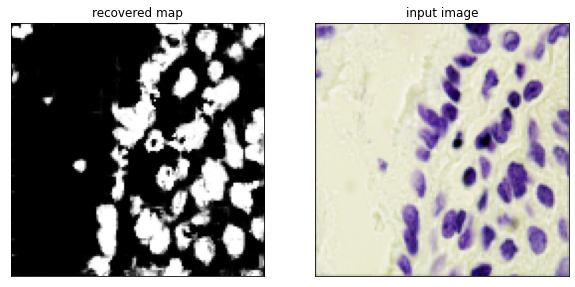

In [9]:
i=22
 
p=per[i]  
p= np.squeeze(p)
p=p.astype('float32')
 
q=val[i]
plot_sample( p,q)

In [11]:
modelv = model(input_img)
# summarize filter shapes
for layer in model.layers:
    # check for convolutional layer
    if 'conv' not in layer.name:
        continue
    # get filter weights
    filters, biases = layer.get_weights()
    print(layer.name, filters.shape)

conv2d_1 (7, 7, 3, 32)
conv2d_2 (1, 1, 32, 3)
conv2d_3 (3, 3, 3, 16)
conv2d_4 (3, 3, 16, 16)
conv2d_5 (3, 3, 16, 32)
conv2d_6 (3, 3, 32, 32)
conv2d_7 (3, 3, 32, 64)
conv2d_8 (3, 3, 64, 64)
conv2d_9 (3, 3, 64, 128)
conv2d_10 (3, 3, 128, 128)
conv2d_11 (3, 3, 128, 256)
conv2d_12 (3, 3, 256, 256)
conv2d_transpose_2 (3, 3, 16, 64)
conv2d_transpose_1 (3, 3, 16, 256)
conv2d_transpose_3 (3, 3, 16, 32)
conv2d_transpose_4 (3, 3, 16, 16)
conv2d_transpose_5 (3, 3, 16, 3)
conv2d_13 (3, 3, 80, 3)
conv2d_14 (1, 1, 3, 3)
conv2d_15 (3, 3, 3, 3)
conv2d_16 (1, 1, 3, 1)


In [71]:
model2 =  Model(input_img, outputs=model.layers[1].output)

In [72]:
img=val[5]
img = np.expand_dims(img, axis=0)
img.shape

(1, 128, 128, 3)

In [73]:
feature_maps=model2.predict(img)
figs=np.squeeze(feature_maps, axis=0)
figs=np.asarray(figs)
figs.shape

(128, 128, 32)

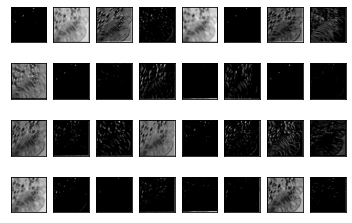

In [74]:
ix=1
for _ in range(4):
    for _ in range(8):
    # specify subplot and turn of axis
        ax = pyplot.subplot(4, 8, ix)
        ax.set_xticks([])
        ax.set_yticks([])
        # plot filter channel in grayscale
        pyplot.imshow(figs[ :, :, ix-1], cmap='gray')
        ix += 1
# show the figure
pyplot.show()